In [ ]:
!pip install simpy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import simpy
import random

In [ ]:
RANGOMENOR=1
RANGOMAYOR=3
NUM_CAJEROS=3
NUM_CLIENTES=1000
MEDIA_EXPO=3

# Simular que dos usuarios quieren acceder a recurso
def recurso_cliente(env, recurso, eleccionCajero):  
  with recurso.request() as peticion: # Genero un evento de requerimiento
    yield peticion # Obtengo el recurso    
    #imprimir_datos_recurso(recurso)
    time=np.random.exponential(MEDIA_EXPO)
    time_cajero[eleccionCajero]+=time
    yield env.timeout(round(time,2)) # Hago uso del recuros por un tiempo de un minito
    recurso.release(peticion) #Libero el recurso despues de su uso.
    #print('Se libera el recurso usuario: ',env.now)
    
def imprimir_datos_recurso(rec):
  print(f'{rec.count} de {rec.capacity}') 
  print(f' Usuarios que hacen uso: {rec.users}')
  print(f' Evento de colas: {rec.queue}')

def llegadaClientes(env,cajeros):   
  recurso = simpy.Resource(env, capacity=NUM_CAJEROS)  
  
  for i in range(NUM_CLIENTES):
    timeLlegada=np.random.uniform(low=RANGOMENOR, high=RANGOMAYOR)
    yield env.timeout(round(timeLlegada,2))#tiempo en llegar los clientes
    #yield env.timeout(0)#tiempo en llegar los clientes
    eleccionCajero = random.choice(list(cajeros.keys()))
    cajeros[eleccionCajero]+=1
    env.process(recurso_cliente(env,recurso,eleccionCajero))
    
env = simpy.Environment()
cajeros={'uno':0,'dos':0,'tres':0}
time_cajero={'uno':0,'dos':0,'tres':0}
env.process(llegadaClientes(env,cajeros))
env.run()
print(env.now)
print(cajeros)
print(time_cajero)

2003.669999999998
{'uno': 339, 'dos': 330, 'tres': 331}
{'uno': 1009.8446477126753, 'dos': 1002.3900652016746, 'tres': 886.5120317884898}


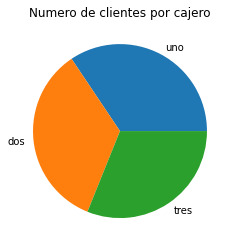

In [ ]:
plt.pie(list(cajeros.values()), labels=list(cajeros.keys()))
plt.title('Numero de clientes por cajero')
plt.show()

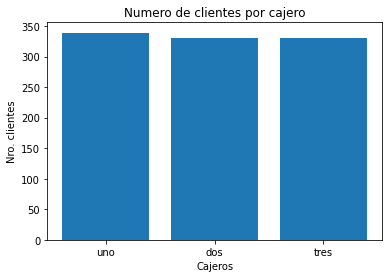

In [ ]:
etiqueta = list(cajeros.keys())
valores = list(cajeros.values())
plt.bar(range(len(cajeros)), valores, align="center", tick_label=etiqueta)
plt.title("Numero de clientes por cajero")
plt.xlabel("Cajeros")
plt.ylabel("Nro. clientes")
plt.show()

In [ ]:
import pandas as pd
df = pd.DataFrame([[key, cajeros[key]] for key in cajeros.keys()], columns=['Num cajero', 'clientes'])
df1 = pd.DataFrame([[key, time_cajero[key]] for key in time_cajero.keys()], columns=['Num cajero', 'tiempo'])
data0 = pd.merge(left=df,right=df1, left_on='Num cajero', right_on='Num cajero')
data0.shape
data0['prom_atencion']=data0['clientes']/data0['tiempo']
data0

,Num cajero,clientes,tiempo,prom_atencion
0,uno,339,1009.844648,0.335695
1,dos,330,1002.390065,0.329213
2,tres,331,886.512032,0.373373


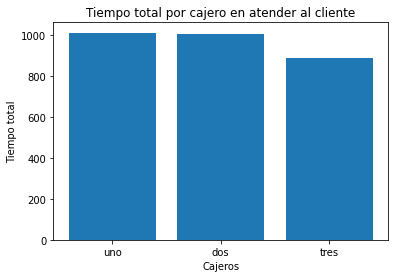

In [ ]:
x_values = data0['Num cajero']
y_values = data0['tiempo']
plt.bar(x_values, y_values)
plt.title("Tiempo total por cajero en atender al cliente")
plt.xlabel("Cajeros")
plt.ylabel("Tiempo total")
plt.show()

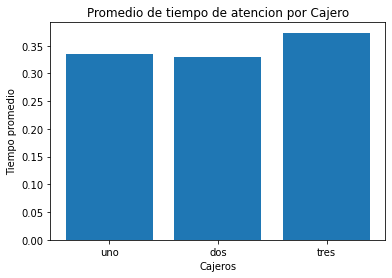

In [ ]:
x_values = data0['Num cajero']
y_values = data0['prom_atencion']
plt.bar(x_values, y_values)
plt.title("Promedio de tiempo de atencion por Cajero")
plt.xlabel("Cajeros")
plt.ylabel("Tiempo promedio")
plt.show()